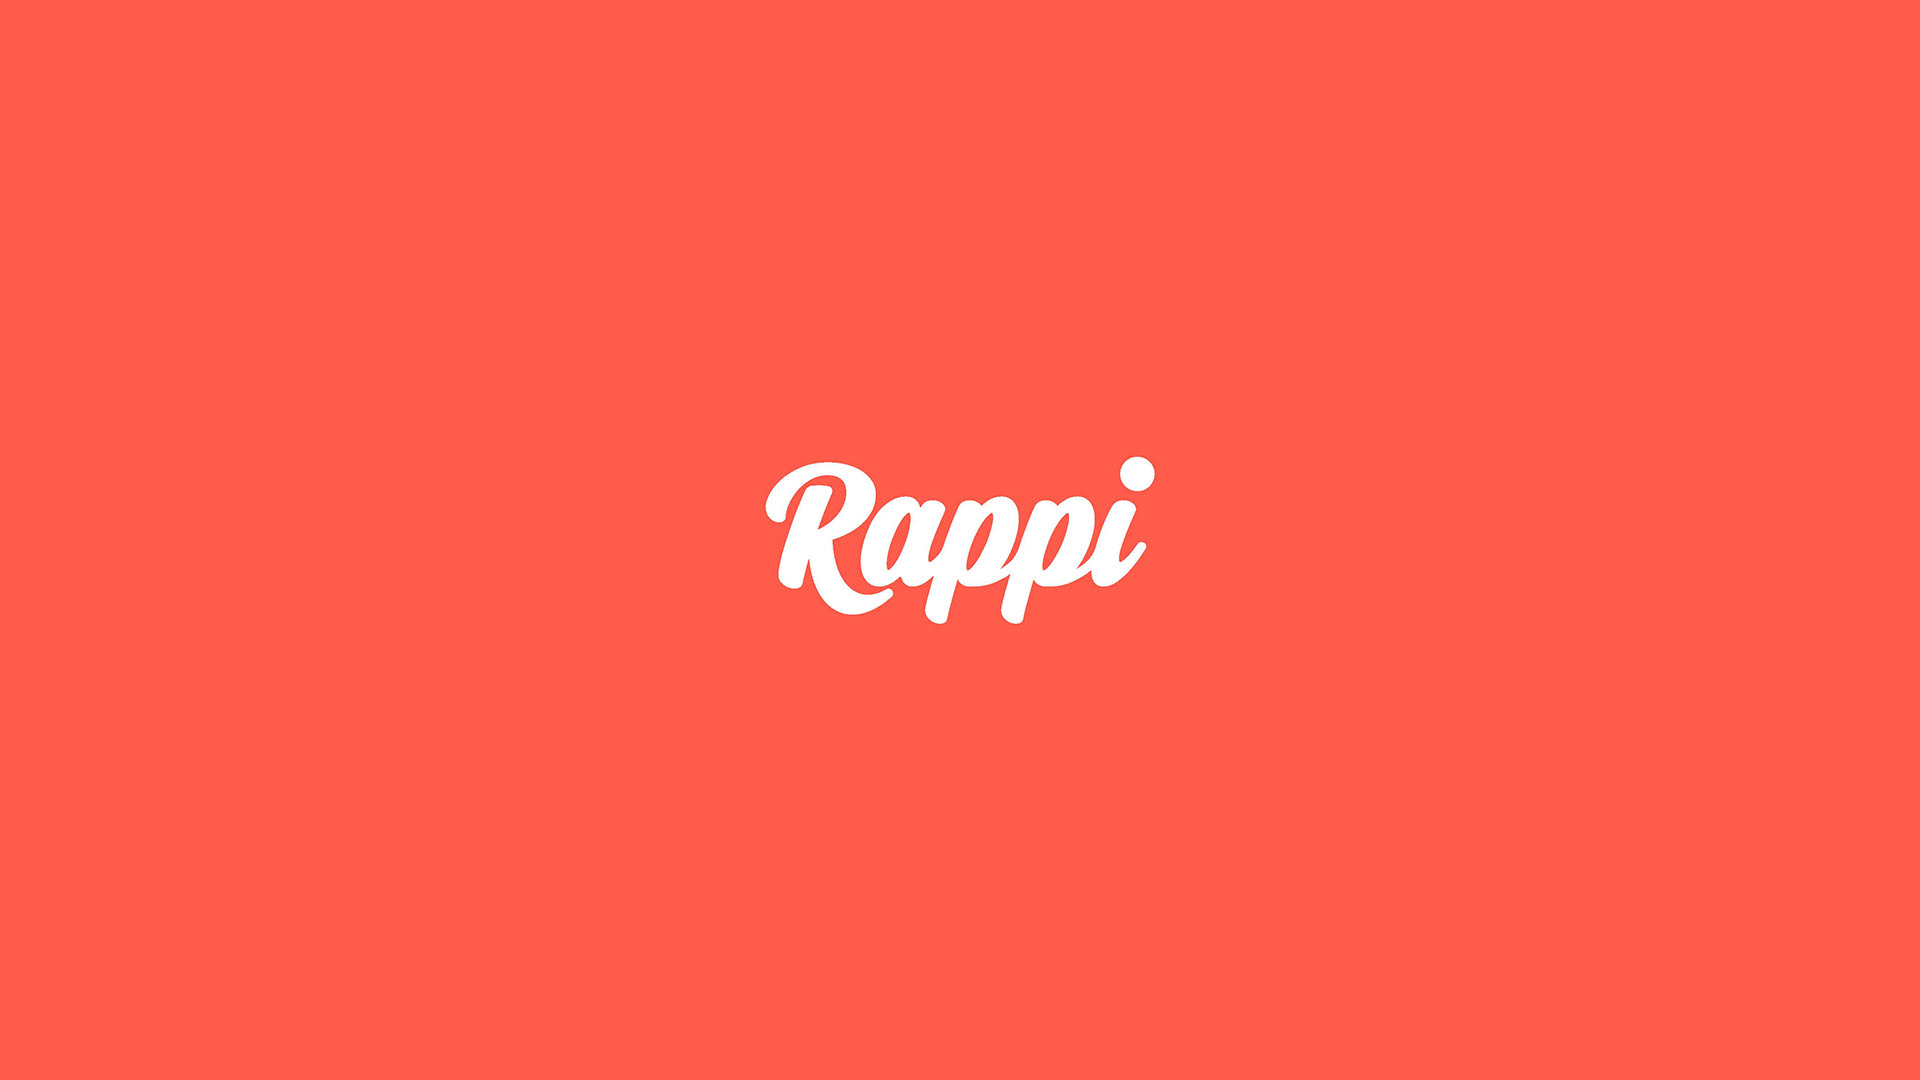


# **Instalação de bibliotecas** 

* Para essa determinada área, fazemos a importação das bibliotecas necessárias para o processo do nosso código. 
* Essa primeira célula é necessária para instalar o pycaret, que usamos para fazer uma análise dos resultados e usufruir dos parâmetros apresentados, com objetivo de aplicar nos algoritmos construídos.

In [ ]:
!pip install pycaret

In [2]:
# Importação das bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import date
from datetime import datetime
import seaborn as sns; sns.set();
import plotly.express as px;
import pyarrow.feather as feather
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
import pycaret
from pycaret.classification import *
from pycaret import classification

* Nessa pequena área, fazemos a conexão com o drive, onde estão nossas features importadas em CSV.

In [3]:
#ativação do google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importação das features**

* Com a conexão ao drive, fizemos uma pasta compartilhada com todas as colunas das nossas features, as quais importamos e transformamos em CSV para ocupar menos RAM do Colab.

In [4]:
#importação da features taxa de aceitação 
acceptance_tax = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/acceptance_tax.csv")

#importação da coluna com todos os entregadores
all_storekeepers = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/all_storekeepers.csv")

#importação da feature de auto aceite
auto_accept = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/auto_accept.csv")

#importação da feature de quantitativo de churns
churns_quantitative = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/churns_quantitative.csv")

#importação da feature de defeitos medios
defects_mean = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/defects_mean.csv")

#importação da feature de ganho medio por modal
media_modal = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/media_modal.csv")

#importação da feature de quantitativo de punições
punishment_quantitative = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/punishment_quantitative.csv")

#importação da feature de taxa de cancelamento de pedidos
storekeeper_cancel_tax = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/storekeeper_cancel_tax.csv")

#importação da feature de categoria do entregador
storekeeper_category = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/storekeeper_category.csv")

* Nessa área, fazemos uma pequena limpeza nas determinadas colunas, limpeza essa que é um drop na coluna específica "Churn(sim=1/não=0)_x". Pelo fato de estar enviesar o algoritmo e atrapalhar nos resultados.


In [5]:
# removendo a coluna intitulada de "Churn(sim=1/não=0)_x" para evitar bugs

all_storekeepers = all_storekeepers.drop(columns = ["Churn(sim=1/não=0)_x"])
auto_accept = auto_accept.drop(columns = ["Churn(sim=1/não=0)_x"])
churns_quantitative = churns_quantitative.drop(columns = ["Churn(sim=1/não=0)_x"])
defects_mean = defects_mean.drop(columns = ["Churn(sim=1/não=0)_x"])
media_modal = media_modal.drop(columns = ["Churn(sim=1/não=0)_x"])
punishment_quantitative = punishment_quantitative.drop(columns = ["Churn(sim=1/não=0)_x"])
storekeeper_cancel_tax = storekeeper_cancel_tax.drop(columns = ["Churn(sim=1/não=0)_x"])
storekeeper_category = storekeeper_category.drop(columns = ["Churn(sim=1/não=0)_x"])

# **Manipulação dos dados**

* Aqui nessa área, fazemos a criação do dataframe com as determinadas colunas das nossas features (colunas as quais importamos anteriormente)

In [6]:
# fazendo o merge das features para criarmos o dataframe que será utilizado no modelo

a = acceptance_tax.merge(auto_accept, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature de taixa de aceitacao

b = a.merge(churns_quantitative, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature de quantidades de churn, no final acabou nao sendo utilizada

c = b.merge(defects_mean, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature de quantidades de defeitos

d = c.merge(media_modal, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature do modal ultilizado pelo entregador

e = d.merge(punishment_quantitative, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
# Feature com a quantidade de punicoes levadas pelo entregador

f = e.merge(storekeeper_cancel_tax, how='inner', left_on='STOREKEEPER_ID', right_on='STOREKEEPER_ID')
# Feature com a quantidade de cancelamentos de entregas feito pelo entregador

g = f.merge(storekeeper_category, how='inner', left_on='STOREKEEPER_ID', right_on='ID').drop(columns=['ID_x','ID_y'])
# Feature da categoria que o entregador se apresenta

* Para essa área, fazemos o drop da coluna count pelo fato de atrapalhar na hora de aplciar as features nos algoritmos e buscar um resultado (causa um vício no algoritmo) 
* Em comparação com os outros Colabs, fizemos certas mudanças pelo fato de percebemos que só isso era necessário. 

In [7]:
g.drop(columns= ['Count']) 

,STOREKEEPER_ID,ACCEPTANCE_RATE,Churn(sim=1/não=0)_x,AUTO_ACEITE,ORDERS,TRANSPORTE,Media_Modal_sim1_não0,Quantidade Punições,Taxa,LEVEL_NAME,Earning_Cat
0,907442.0,0.666102,1.0,True,5.189542,bicycle,1.0,11.0,0.044025,bronze,0.0
1,1393441.0,0.556538,1.0,True,3.806122,bicycle,1.0,86.0,0.103806,bronze,1.0
2,1061798.0,0.777838,1.0,True,8.109375,car,1.0,27.0,0.042910,bronze,1.0
3,103460.0,0.160980,1.0,True,2.945946,bicycle,0.0,13.0,0.030000,bronze,0.0
4,1259998.0,0.856102,1.0,True,6.764286,bicycle,1.0,160.0,0.089799,bronze,1.0
...,...,...,...,...,...,...,...,...,...,...,...
164526,1399167.0,0.000000,1.0,True,2.000000,motorbike,0.0,0.0,0.000000,rookie,0.0
164527,824240.0,0.000000,0.0,False,1.105263,neither,0.0,1.0,0.281046,rookie,0.0
164528,1112422.0,0.000000,0.0,False,1.041667,neither,0.0,1.0,0.960000,bronze,0.0
164529,1256781.0,0.000000,0.0,False,1.066667,neither,0.0,0.0,1.000000,rookie,0.0


# **Balanceamento das features**

* Primeiramente, dividimos nossas features em duas novas variáveis, X e Y, no sentido que os resultados de X afetassem Y. Para isso, fizemos o balanceamento dos dados internos, a partir de um oversample. 

* No processo de oversample, o qual objetificamos usar para balancear as features, há a manipulação das samples - que é pepar uma amostra dos dados e não a população total - aproximando a descrepância entre as "amostras" que são aplicadas nas colunas.

* Por fim, fazemos a divisão dos dados para treino e teste das nossas features, pois dessa forma irá facilitar na hora de rodar o código... Na parte final, há valores usados como semente para a preparação do treino e teste (podem ser alterados, mas é sugerido verificar a documentação do sklearn)

In [8]:
# Dividindo x e y
x = g[['ACCEPTANCE_RATE', 'AUTO_ACEITE', 'ORDERS', 'Media_Modal_sim1_não0', 'Quantidade Punições', 'Taxa', 'Earning_Cat']]
y = g[["Churn(sim=1/não=0)_x"]]


# Balanceamento das features

oversample = RandomOverSampler(sampling_strategy='minority') 
x_over, y_over = oversample.fit_resample(x, y) 


# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, 
                                                    test_size = 0.2, 
                                                    random_state = 1) # qualquer valor como semente do pseudo-random

# **Treino do algoritmo**

* Após a manipulação dos dados e do balanceamento dos mesmos, além de já ter dividido os dados para o treino e teste, agora iremos fazer os treinos. 
* Para isso, demonstramos a situação dos dados antes da aplicação do *oversample* e após a aplicação do *oversample*.
* Os resultados mostram como houve uma "limpeza" e diminuição nos valores, facilitando na preparação para o teste.

In [9]:
#mostra o numero de samples antes do oversample
print("Antes")
print(len(y_over))
print(len(x_over))

# mostra o numero de samples depois do oversample
print(" ")
print("Depois")
print(len(x))
print(len(y))

Antes
255768
255768
 
Depois
164531
164531


#***Pycaret***

* **O que é PyCaret?**
  * PyCaret é uma biblioteca do Python que permite que você faça todo o ciclo da criação de um modelo de Machine Learning com poucas linhas de código.

* Agora, sabendo o que é o Pycaret, é possível entender o porquê de usarmos os parâmetros que ele mesmo apresenta, pelo alta probabilidade de apresentar um alto valor. 
* Porém, **só usamos como referência de parâmetros**, os valores apresentados no Pycaret **não são usados ou aplicados em nenhuma estrutura do modelo**. Já que, o resultado final, o qual ele apresenta, demonstra um desvio no balanceamento dos valores esperados (essa afirmação foi constatada após a obeservação da matriz de confusão de qualquer algoritmo, além de ter confirmado com o professor).

In [10]:
# importando a biblioteca do pycaret
from pycaret.classification import setup

In [12]:
# gerando uma comparação dos modelos com o uso do pycaret
exp_name = setup(data = g,  target = "Churn(sim=1/não=0)_x", ignore_features = ['Count', 'TRANSPORTE', 'LEVEL_NAME'])
best_model = compare_models(include=['rf'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8267,0.8087,0.9457,0.8486,0.8945,0.4169,0.437,15.769


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8178, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [13]:
# avaliando os parametros do modelo Random Forest
rf_pycaret = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8209,0.8050,0.9421,0.8451,0.8910,0.3973,0.4165
1,0.8303,0.8100,0.9477,0.8509,0.8967,0.4298,0.4501
2,0.8313,0.8168,0.9473,0.8521,0.8972,0.4347,0.4543
3,0.8298,0.8121,0.9456,0.8517,0.8962,0.4310,0.4498
4,0.8243,0.8003,0.9421,0.8485,0.8929,0.4126,0.4307
5,0.8229,0.8082,0.9431,0.8465,0.8922,0.4043,0.4236
6,0.8250,0.8077,0.9460,0.8468,0.8937,0.4090,0.4299
7,0.8295,0.8150,0.9479,0.8499,0.8962,0.4256,0.4464
8,0.8240,0.8044,0.9473,0.8450,0.8932,0.4024,0.4247


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8178, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


# **Rodando na Mão** + **Hiperparâmetros**

## **Random Forest** 

In [14]:
# utilizando os parametros coletados no create_model
parametros = {'bootstrap':[True], 'ccp_alpha':[0.0], 'class_weight':[None],
              'criterion':['gini'], 'max_depth':[None], 'max_features':['auto'],
              'max_leaf_nodes':[None], 'max_samples':[None],
              'min_impurity_decrease':[0.0], 'min_impurity_split':[None],
              'min_samples_leaf':[1], 'min_samples_split':[2],
              'min_weight_fraction_leaf':[0.0], 'n_estimators':[100],
              'n_jobs':[-1], 'oob_score':[False], 'random_state':[4930], 'verbose':[0],
              'warm_start':[False]}

random_search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = parametros)
random_search.fit(x_train, y_train.squeeze())

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [15]:
# buscando os melhores estimadores
rf = random_search.best_estimator_
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4930, verbose=0,
                       warm_start=False)

In [16]:
# puxando as metricas para analisar se o modelo está apresentando um bom resultado
y_pred = rf.predict(x_test)
print('Acc treino: ', rf.score(x_train, y_train ))
print('Acc teste: ', rf.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred))
print( 'Precisão: ', precision_score( y_test, y_pred ))
print( 'F1_score: ', f1_score( y_test, y_pred ))

Acc treino:  0.9786036146109259
Acc teste:  0.8904484497790984
Revocação:  0.8475849453158448
Precisão:  0.9280630726614106
F1_score:  0.8860002441108263


#**Salvando os modelos**

* Nessa área, salvamos o modelo para fazer o deploy e puxar em outro notebook, o qual será entregue para o cliente.
* Aplicamos uma importação necessária para fazer o dump(salvar o modelo) e progredir para a exportação.

In [17]:
from joblib import dump

# realizando o deploy dos modelos Random Forest e Gradient Boostes no drive 
dump(rf, '/content/drive/Shareddrives/Bases Compartilhadas/modelo_final/modelRandomf')

['/content/drive/Shareddrives/Bases Compartilhadas/modelo_final/modelRandomf']